In [33]:
#Import necessary libraries
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from textblob import TextBlob
stop_words= set(stopwords.words('english'))
#function to clean the given tweets with NP processes- Stemming, lemmatization and Tokenization
def clean_text(texts):
    clean_texts = []
    for text in texts:
        text = text.lower()
        tokens = word_tokenize(text)
        cleaned_tokens = []
        lemmatizer = WordNetLemmatizer()
        for word in tokens:
            if (word.isalnum()) and (not word.isdigit()) and (word not in stop_words):
                word = word.strip(string.punctuation)
                word = lemmatizer.lemmatize(word)
                word = word.strip()
                cleaned_tokens.append(word)
            cleaned_text = " ".join(cleaned_tokens)
        clean_texts.append(cleaned_text)
    return clean_texts

#function to find the sentiments
def get_sentiment(texts):
    sentiments = []
    polarity = []
    subjectivity = []
    for text in texts:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity>0:
            sentiments.append("Positive")
            polarity.append(analysis.sentiment.polarity)
            subjectivity.append(analysis.sentiment.subjectivity)
        #elif analysis.sentiment.polarity<0:
        else:
            sentiments.append("Negative")
            polarity.append(analysis.sentiment.polarity)
            subjectivity.append(analysis.sentiment.subjectivity)
    return sentiments,polarity,subjectivity
           
#Reading the downloaded toxic tweets dataset and writing into a Pandas Dataframe
df = (pd.read_csv(r"E:\DataScience\FinalBalancedDataset.csv")).head(1000)
#Executing the above two functions on the given dataset
df['cleaned_text'] = clean_text(df['tweet'].values)
df['sentiment'] = get_sentiment(df['cleaned_text'].values)[0]
df['polarity'] =  get_sentiment(df['cleaned_text'].values)[1]
df['subjectivity'] = get_sentiment(df['cleaned_text'].values)[2]
df


,Unnamed: 0,Toxicity,tweet,cleaned_text,sentiment,polarity,subjectivity
0,0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...,Negative,-0.300000,0.535417
1,1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca use cause offe...,Positive,0.200000,0.200000
2,2,0,bihday your majesty,bihday majesty,Negative,0.000000,0.000000
3,3,0,#model i love u take with u all the time in ...,model love u take u time,Positive,0.500000,0.600000
4,4,0,factsguide: society now #motivation,factsguide society motivation,Negative,0.000000,0.000000
...,...,...,...,...,...,...,...
995,995,0,are you really or just pretending to be? #t...,really pretending truthseekers empowerment sel...,Positive,0.200000,0.200000
996,996,0,i finally found a way how to delete old tweets...,finally found way delete old tweet might find ...,Positive,0.133333,0.400000
997,997,0,@user what a #view #oregon #poland #usa #un...,user view oregon poland usa unitedstates holid...,Negative,0.000000,0.000000
998,998,0,"have you put in your #vote yet? if you havent,...",put vote yet havent share see make smile poll,Positive,0.300000,0.100000


In [34]:
#TF-IDF calculation
from sklearn.feature_extraction.text import TfidfVectorizer
model=TfidfVectorizer()
# df2=pd.DataFrame(df1['text'])
# df2
df1=pd.DataFrame(model.fit_transform(df['tweet']).toarray())
df1.index=(df['tweet'])
df1

,0,1,2,3,4,5,6,7,8,9,...,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019
tweet,,,,,,,,,,,,,,,,,,,,,
@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bihday your majesty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
factsguide: society now #motivation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
are you really or just pretending to be? #truthseekers #empowerment #selfimprovement #healing #ihearadio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
i finally found a way how to delete old tweets! you might find it useful as well: #deletetweets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
@user what a #view #oregon #poland #usa #unitedstates #holiday #dj #producer #houseâ¦,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#Training the ML models
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
stop_words=set(stopwords.words('english'))
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
def clean_text(texts):
    
    clean_texts=[]
    for text in texts:
        text=text.lower()
        tokens=word_tokenize(text)
        cleaned_tokens=[]
        lemmatizer=WordNetLemmatizer()
        for word in tokens:
            if word.isalnum() and (not word.isdigit()) and (word not in stop_words):
                word=word.strip(string.punctuation)
                word=lemmatizer.lemmatize(word)
                cleaned_tokens.append(word)
            cleaned_text=" ".join(cleaned_tokens)
        clean_texts.append(cleaned_text)
    return clean_texts
df=pd.read_csv(r"E:\DataScience\FinalBalancedDataset.csv")
df=df.tail(1000)
corpus=clean_text(df['tweet'].values)
model=TfidfVectorizer()
data=pd.DataFrame(model.fit_transform(corpus).toarray())
data.columns=model.get_feature_names_out()
data.index=corpus
data['target']=df['Toxicity']
X=data.drop(['target'],axis=1)

y=df['Toxicity']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# Train Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)
 
# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

# Evaluate classifiers
nb_predictions = nb_classifier.predict(x_test)
svm_predictions = svm_classifier.predict(x_test)
 
# Print classification reports
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
 
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

models=[SVC(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier()]
for model in models:
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    print(f"-------------{type(model)}___name___-----------")
    print(f"acc: {accuracy_score(y_train,train_pred)}")
    print(f"pred: {precision_score(y_train,train_pred)}")
    print(f"rec: {recall_score(y_train,train_pred)}")
    print(f"f1: {f1_score(y_train,train_pred)}")


    print(f"acctest: {accuracy_score(y_test,test_pred)}")
    print(f"predtest: {precision_score(y_test,test_pred)}")
    print(f"rectest: {recall_score(y_test,test_pred)}")
    print(f"f1test: {f1_score(y_test,test_pred)}")


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       183

    accuracy                           0.92       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.84      0.92      0.87       200


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.24      0.36        17
           1       0.93      0.99      0.96       183

    accuracy                           0.93       200
   macro avg       0.87      0.61      0.66       200
weighted avg       0.92      0.93      0.91       200



C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

-------------<class 'sklearn.svm._classes.SVC'>___name___-----------
acc: 0.995
pred: 0.994413407821229
rec: 1.0
f1: 0.9971988795518207
acctest: 0.91
predtest: 0.914572864321608
rectest: 0.994535519125683
f1test: 0.9528795811518325
-------------<class 'sklearn.neighbors._classification.KNeighborsClassifier'>___name___-----------
acc: 0.91125
pred: 0.9114249037227214
rec: 0.9971910112359551
f1: 0.9523809523809523
acctest: 0.915
predtest: 0.9278350515463918
rectest: 0.9836065573770492
f1test: 0.9549071618037135
-------------<class 'sklearn.tree._classes.DecisionTreeClassifier'>___name___-----------
acc: 1.0
pred: 1.0
rec: 1.0
f1: 1.0
acctest: 0.91
predtest: 0.9459459459459459
rectest: 0.9562841530054644
f1test: 0.9510869565217391
-------------<class 'sklearn.ensemble._forest.RandomForestClassifier'>___name___-----------
acc: 1.0
pred: 1.0
rec: 1.0
f1: 1.0
acctest: 0.915
predtest: 0.9191919191919192
rectest: 0.994535519125683
f1test: 0.9553805774278216


In [ ]:
#When ``true positive + false positive == 0``, precision is undefined.   
#When ``true positive + false negative == 0``, recall is undefined.  
#In such cases, by default the metric will be set to 0, as will f-score,
#and ``UndefinedMetricWarning`` will be raised. 
#This behavior can be   modified with ``zero_division``.


Training Accuracy score: 0.99875
Testing Accuracy score: 0.905
              precision    recall  f1-score   support

           0       0.43      0.35      0.39        17
           1       0.94      0.96      0.95       183

    accuracy                           0.91       200
   macro avg       0.68      0.65      0.67       200
weighted avg       0.90      0.91      0.90       200

Confusion matrix
 [[  6  11]
 [  8 175]]


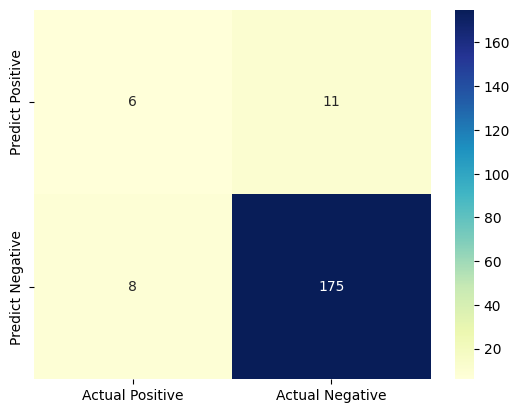

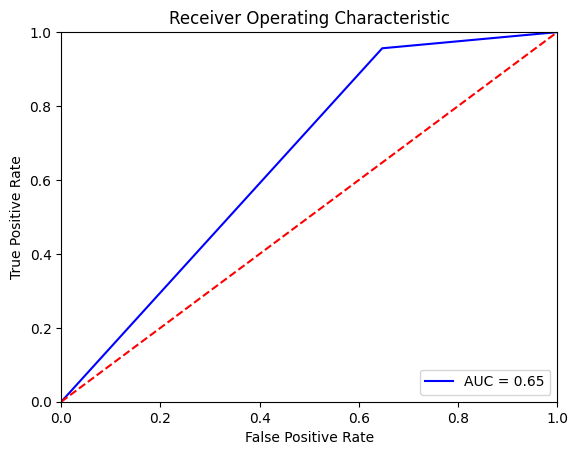

In [36]:
#Naive Bayes
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = gnb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Training Accuracy score: 0.995
Testing Accuracy score: 0.91
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.91      0.99      0.95       183

    accuracy                           0.91       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.84      0.91      0.87       200

Confusion matrix for SVC 
 [[  0  17]
 [  1 182]]


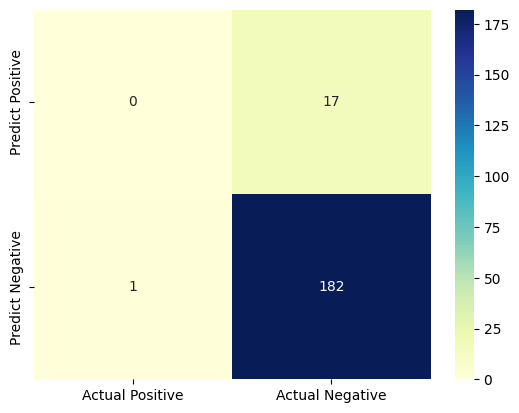

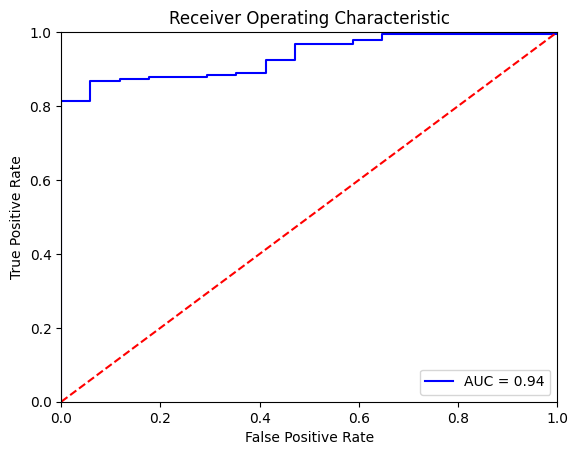

In [38]:
#SVC(Support Vector Classification)

model=SVC(probability=True)
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for SVC \n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Training Accuracy score: 0.91875
Testing Accuracy score: 0.9
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        22
           1       0.90      1.00      0.95       178

    accuracy                           0.90       200
   macro avg       0.95      0.55      0.56       200
weighted avg       0.91      0.90      0.86       200

Confusion matrix for KNeighborsClassifier
 [[  2  20]
 [  0 178]]


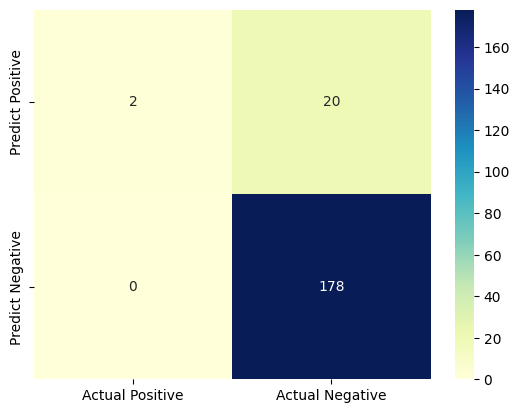

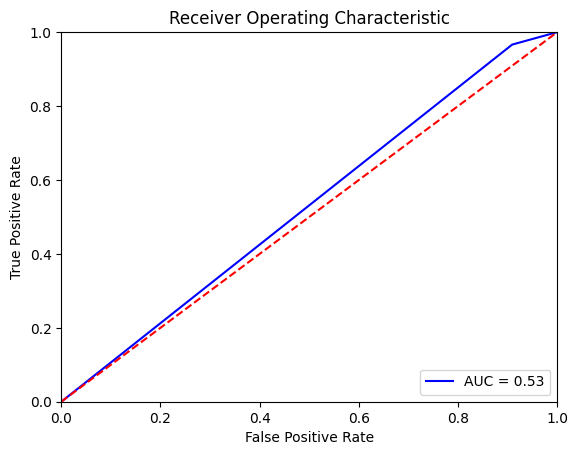

In [36]:
#KNeighbours Classification

model=KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for KNeighborsClassifier\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Training Accuracy score: 1.0
Testing Accuracy score: 0.905
              precision    recall  f1-score   support

           0       0.43      0.35      0.39        17
           1       0.94      0.96      0.95       183

    accuracy                           0.91       200
   macro avg       0.68      0.65      0.67       200
weighted avg       0.90      0.91      0.90       200

Confusion matrix for DecisionTreeClassifier
 [[  6  11]
 [  8 175]]


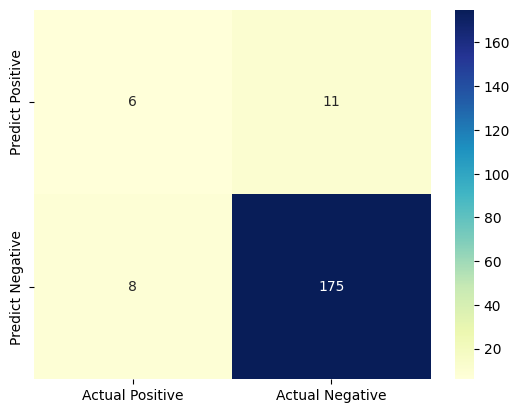

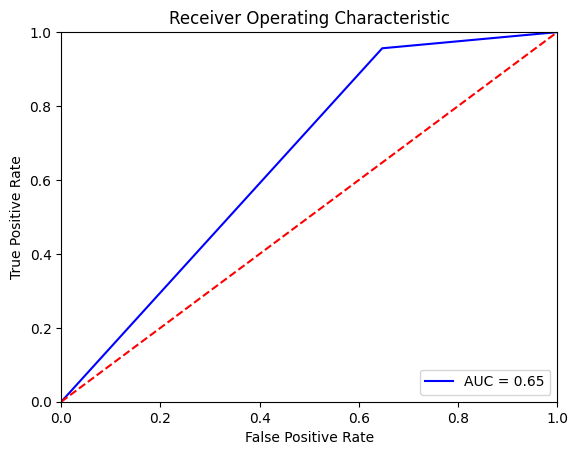

In [40]:
#DecisionTreeClassifier(),

model=DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for DecisionTreeClassifier\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Training Accuracy score: 0.99875
Testing Accuracy score: 0.905
              precision    recall  f1-score   support

           0       0.43      0.35      0.39        17
           1       0.94      0.96      0.95       183

    accuracy                           0.91       200
   macro avg       0.68      0.65      0.67       200
weighted avg       0.90      0.91      0.90       200

Confusion matrix for RandomForestClassifier
 [[  6  11]
 [  8 175]]


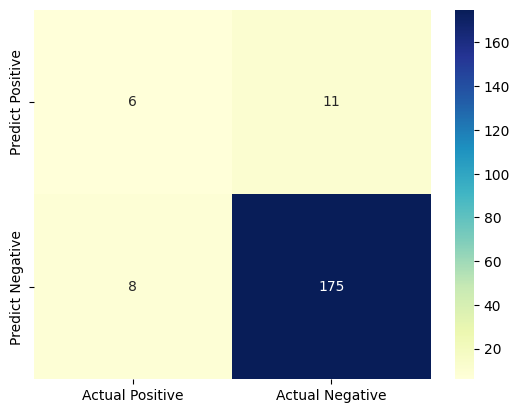

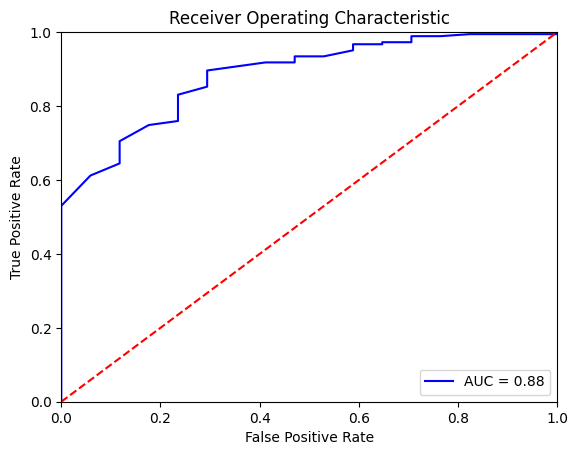

In [39]:
#RandomForest Classification
model=RandomForestClassifier()
model.fit(x_train, y_train)

y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for RandomForestClassifier\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()